In [1]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Data Generating

In [2]:
x1_Pos = []
x2_Pos = []
y_Pos = []

for i in range(1000):
    temp = 4.0 * np.random.rand() - 2.0
    y_Pos.append(1)
    x1_Pos.append(temp)
    if i % 2 == 0:
        x2_Pos.append(np.sqrt(4.0 - temp ** 2) + 0.3 * np.random.randn())
    elif i % 2 == 1:
        x2_Pos.append(- np.sqrt(4.0 - temp ** 2) + 0.3 * np.random.randn())
        
#===============================================================

x1_Neg = []
x2_Neg = []
y_Neg = []

for i in range(1000):
    temp = 10.0 * np.random.rand() - 5.0
    y_Neg.append(0)
    x1_Neg.append(temp)
    if i % 2 == 0:
        x2_Neg.append(np.sqrt(25.0 - temp ** 2) + 0.3 * np.random.randn())
    elif i % 2 == 1:
        x2_Neg.append(- np.sqrt(25.0 - temp ** 2) + 0.3 * np.random.randn())


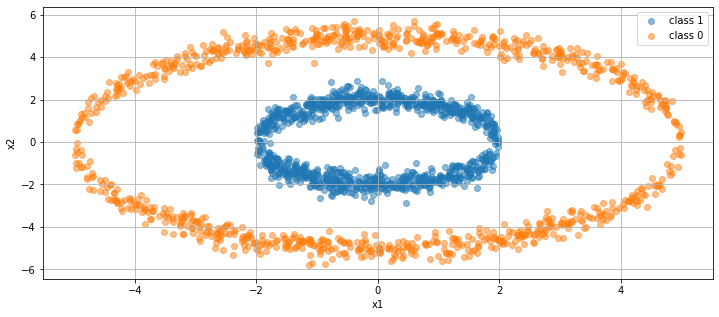

In [3]:
plt.figure(figsize = (12, 5))
plt.scatter(x1_Pos, x2_Pos, label = "class 1", alpha = 0.5)
plt.scatter(x1_Neg, x2_Neg, label = "class 0", alpha = 0.5)
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid()
plt.show()

In [4]:
Dict = {"x1" : x1_Pos + x1_Neg, "x2" : x2_Pos + x2_Neg, "y" : y_Pos + y_Neg}
DataTrain = pd.DataFrame(Dict)
DataTrain

,x1,x2,y
0,1.476177,1.680983,1
1,-1.282476,-1.283297,1
2,-0.018254,1.516451,1
3,1.036410,-1.652053,1
4,1.148894,1.693004,1
5,1.474543,-1.307152,1
6,1.513424,1.507600,1
7,-1.782213,-0.061341,1
8,-1.408023,1.659077,1
9,0.489710,-1.381331,1


In [15]:
DataTrain['x2'].dtype

dtype('float64')

In [5]:
x1_Pos = []
x2_Pos = []
y_Pos = []

for i in range(250):
    temp = 4.0 * np.random.rand() - 2.0
    y_Pos.append(1)
    x1_Pos.append(temp)
    if i % 2 == 0:
        x2_Pos.append(np.sqrt(4.0 - temp ** 2) + 0.3 * np.random.randn())
    elif i % 2 == 1:
        x2_Pos.append(- np.sqrt(4.0 - temp ** 2) + 0.3 * np.random.randn())
        
#===========================================================================

x1_Neg = []
x2_Neg = []
y_Neg = []

for i in range(250):
    temp = 10.0 * np.random.rand() - 5.0
    y_Neg.append(0)
    x1_Neg.append(temp)
    if i % 2 == 0:
        x2_Neg.append(np.sqrt(25.0 - temp ** 2) + 0.3 * np.random.randn())
    elif i % 2 == 1:
        x2_Neg.append(- np.sqrt(25.0 - temp ** 2) + 0.3 * np.random.randn())


In [6]:
Dict = {"x1" : x1_Pos + x1_Neg, "x2" : x2_Pos + x2_Neg, "y" : y_Pos + y_Neg}
DataTest = pd.DataFrame(Dict)
DataTest

,x1,x2,y
0,-1.908742,1.268989,1
1,-1.087422,-1.691457,1
2,1.258457,1.600326,1
3,-1.072109,-1.150153,1
4,0.449893,2.101622,1
5,-0.665444,-2.223797,1
6,-1.023634,2.026588,1
7,1.412431,-1.659849,1
8,1.558048,1.714667,1
9,1.226213,-1.260636,1


# Model Training

$$\vec {x} \in \mathbb{R}^{1\times 2}$$

$$W_1 \in \mathbb{R}^{2\times 10}$$

$$b_1 \in \mathbb{R}^{1\times 10}$$

$$W_2 \in \mathbb{R}^{10\times 2}$$

$$b_2 \in \mathbb{R}^{1\times 2}$$

$$z_1 = \sigma(\vec {x}W_1 + b_1)$$

$$z_2 = \sigma({z_1}{W_2} + b_2)$$

$$\hat y = softmax(z_2)$$

cross entropy loss function $$Loss(W_1,W_2,b_1,b_2) = -\frac{1}{N}\sum_{i = 1}^{N}[y_i\log \hat{y_i} + (1-y_i)\log(1-\hat{y_i})]$$

$$k = 0, 1, 2, ...$$

$$W_1^{(k+1)}=W_1^{(k)} - \alpha_k\frac{\partial Loss(W_1^{(k)},W_2^{(k)},b_1^{(k)},b_2^{(k)})}{\partial W_1}$$

$$W_2^{(k+1)}=W_2^{(k)} - \alpha_k\frac{\partial Loss(W_1^{(k)},W_2^{(k)},b_1^{(k)},b_2^{(k)})}{\partial W_2}$$

$$b_1^{(k+1)}=b_1^{(k)} - \alpha_k\frac{\partial Loss(W_1^{(k)},W_2^{(k)},b_1^{(k)},b_2^{(k)})}{\partial b_1}$$

$$b_2^{(k+1)}=b_2^{(k)} - \alpha_k\frac{\partial Loss(W_1^{(k)},W_2^{(k)},b_1^{(k)},b_2^{(k)})}{\partial b_2}$$


In [7]:
class DeepNeuralNetworkModel(nn.Module):
    
    #constructor of the class
    def __init__(self, input_dim1, output_dim1, input_dim2, output_dim2): #output_dim1=input_dim2
        super(DeepNeuralNetworkModel, self).__init__()
        
        #Fully connected layer 1
        self.FC_layer1 = nn.Linear(input_dim1, output_dim1) #give weight,bias
        
        #Fully connected layer 2
        self.FC_layer2 = nn.Linear(input_dim2, output_dim2)
        
        #Activation Function sigmoid
        self.act_sig = nn.Sigmoid()
    
    #forward propagation function
    def forward(self,x):
        z1_ = self.FC_layer1(x)
        z1 = self.act_sig(z1_)
        
        z2_ = self.FC_layer2(z1)
        z2 = self.act_sig(z2_)
        
        return z2
     

In [43]:
X_vec = torch.tensor(np.array(DataTrain[["x1","x2"]])).float()  #N * 2 
y_vec = torch.tensor(np.array(DataTrain[["y"]])).reshape(-1,1).long() #N * 1

In [44]:
alpha = 0.2
DNN_Model = DeepNeuralNetworkModel(2,10 ,10 ,2)
optimizer = torch.optim.SGD(DNN_Model.parameters(), lr = alpha) #gradient descendnt
loss_function = nn.CrossEntropyLoss()

#Dynamically change the learning rate
def adjust_learning_rate(optimizer, epoch):
    lr = alpha/(1+0.00001 * epoch)
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

In [45]:
Iter_times = 200000
loss_list = []

for i in range(Iter_times):
    
    outputs = DNN_Model.forward(X_vec)
    
    loss = loss_function(outputs, torch.squeeze(y_vec))
    
    loss.backward()
    
    optimizer.step()
    
    optimizer.zero_grad()
    
    if (i+1) % 500 == 0:
        print(i+1, "iterations have been made")
        print("now loss is ", loss)
        print("========================================")
        
    adjust_learning_rate(optimizer, i)
    
    loss_list.append(loss)
    
    

500 iterations have been made
now loss is  tensor(0.6801, grad_fn=<NllLossBackward>)
1000 iterations have been made
now loss is  tensor(0.6242, grad_fn=<NllLossBackward>)
1500 iterations have been made
now loss is  tensor(0.5193, grad_fn=<NllLossBackward>)
2000 iterations have been made
now loss is  tensor(0.4547, grad_fn=<NllLossBackward>)
2500 iterations have been made
now loss is  tensor(0.4232, grad_fn=<NllLossBackward>)
3000 iterations have been made
now loss is  tensor(0.4060, grad_fn=<NllLossBackward>)
3500 iterations have been made
now loss is  tensor(0.3933, grad_fn=<NllLossBackward>)
4000 iterations have been made
now loss is  tensor(0.3723, grad_fn=<NllLossBackward>)
4500 iterations have been made
now loss is  tensor(0.3577, grad_fn=<NllLossBackward>)
5000 iterations have been made
now loss is  tensor(0.3501, grad_fn=<NllLossBackward>)
5500 iterations have been made
now loss is  tensor(0.3446, grad_fn=<NllLossBackward>)
6000 iterations have been made
now loss is  tensor(0.34

KeyboardInterrupt: 

# visualization of cross entropy losss

the length of loss list is  28565


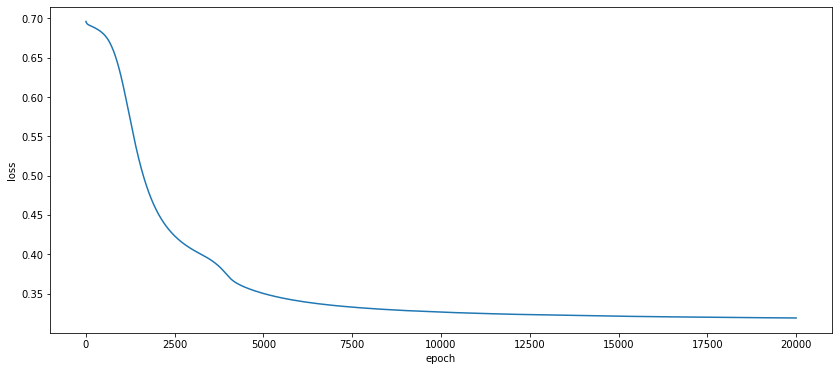

In [46]:
plt.figure(figsize = (14,6))
length = loss_list.__len__()
print("the length of loss list is ", length)
plt.plot(np.arange(1,20001,1),loss_list[0:20000])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

# prediction on the test set and model evaluation

In [47]:
X_vec_test = torch.tensor(np.array(DataTest[["x1","x2"]])).float()  #N * 2 
y_vec_test = torch.tensor(np.array(DataTest[["y"]])).reshape(-1,1).long() #N * 1
pred = DNN_Model.forward(X_vec_test)
#pred_vec = 

In [48]:
pred

tensor([[4.1672e-02, 9.5824e-01],
        [2.4558e-03, 9.9752e-01],
        [7.3393e-03, 9.9264e-01],
        [9.1335e-04, 9.9909e-01],
        [4.0817e-03, 9.9602e-01],
        [1.0239e-02, 9.8950e-01],
        [9.8993e-03, 9.9076e-01],
        [6.6433e-03, 9.9319e-01],
        [2.7774e-02, 9.7175e-01],
        [2.1779e-03, 9.9782e-01],
        [1.4003e-02, 9.8646e-01],
        [2.7938e-03, 9.9718e-01],
        [1.3115e-03, 9.9875e-01],
        [7.7849e-03, 9.9268e-01],
        [4.7246e-03, 9.9514e-01],
        [6.9330e-03, 9.9278e-01],
        [5.7697e-03, 9.9423e-01],
        [3.5649e-03, 9.9627e-01],
        [3.3809e-03, 9.9679e-01],
        [2.4466e-03, 9.9751e-01],
        [5.8134e-03, 9.9450e-01],
        [1.5615e-03, 9.9843e-01],
        [2.2196e-02, 9.7954e-01],
        [1.2120e-03, 9.9879e-01],
        [4.6377e-03, 9.9567e-01],
        [2.3033e-03, 9.9768e-01],
        [5.6826e-03, 9.9433e-01],
        [3.9530e-03, 9.9592e-01],
        [1.2786e-02, 9.8787e-01],
        [7.019

In [49]:
pred_vec = pred[:, 1]
pred_vec[pred_vec > 0.50] = 1
pred_vec[pred_vec <= 0.50] = 0
pred_vec

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 

In [50]:
y_pred_np = pred_vec.detach().numpy() #.cpu().numpy()
y_pred_np = np.squeeze(y_pred_np)
y_pred_np.shape

y_test = y_vec_test.detach().numpy()
y_test = np.squeeze(y_test)

accuracy = accuracy_score(y_pred_np, y_test)
print("the accuracy score is : ", accuracy)

the accuracy score is :  1.0
